In [1]:
import os, pickle
from tqdm import tqdm  # Import tqdm for progress tracking
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm


## Load Important Function

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)
    

## Plain MD

In [3]:
def plain_md_index_to_state(index):
    """Converts an index (0-7) into a (3,) binary state array."""
    if not (0 <= index < 8):  # Ensure valid range (0-7)
        raise ValueError(f"Index out of range: {index}. Expected 0-7.")

    # Convert index to a 3-bit binary string
    binary_str = format(index, '03b')  # Example: 3 -> '011'
    
    # Convert binary string to NumPy array of integers
    state = np.array([int(bit) for bit in binary_str], dtype=int)

    return state

In [4]:
plain_md_path = '../Plain_MD/analysis'

omega_loaded = Data.load(f"{plain_md_path}/autocoorel_data/stationary_distributions_1800ns_5ns_clustersize100.pkl").array_list
plain_md_pi_all_means = omega_loaded[0]
plain_md_pi_all_stds = omega_loaded[3]
plain_md_lagtimes_ns = omega_loaded[8]

plain_md_pi_all_means


array([[0.07747281, 0.06973392, 0.05973882, ..., 0.23107664, 0.15221155,
        0.17388289],
       [0.07962224, 0.07250735, 0.06207896, ..., 0.23003451, 0.1543872 ,
        0.16743706],
       [0.07715476, 0.07044348, 0.05882812, ..., 0.23382815, 0.15036669,
        0.16946157],
       ...,
       [0.11758174, 0.11758174, 0.11758174, ..., 0.12999946, 0.11758174,
        0.11758174],
       [0.11728873, 0.11728873, 0.11728873, ..., 0.129413  , 0.11728873,
        0.11728873],
       [0.11694134, 0.11694134, 0.11694134, ..., 0.12871769, 0.11694134,
        0.11694134]])

201.0:0.076 +- 0.015
201.0:0.067 +- 0.027
201.0:0.066 +- 0.030
201.0:0.064 +- 0.012
201.0:0.165 +- 0.030
201.0:0.220 +- 0.053
201.0:0.160 +- 0.060
201.0:0.180 +- 0.032


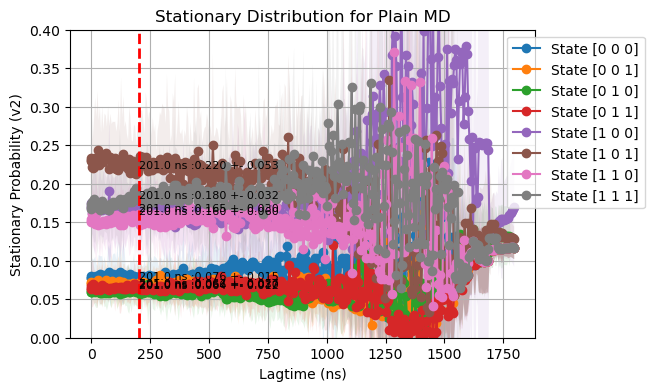

In [5]:
plt.figure(figsize=(6, 4))
state_to_plot = range(8)  # Fix: Select states 0 to 7

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(plain_md_lagtimes_ns, plain_md_pi_all_means[:, i], '-o', label=f'State {plain_md_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(plain_md_lagtimes_ns, 
                     plain_md_pi_all_means[:, i] + plain_md_pi_all_stds[:, i],  # Upper bound
                     plain_md_pi_all_means[:, i] - plain_md_pi_all_stds[:, i],  # Lower bound
                     alpha=0.1)

    # Annotate the first point with its value
    first_x = plain_md_lagtimes_ns[44]
    first_y = plain_md_pi_all_means[44, i]
    first_y_var = plain_md_pi_all_stds[44, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=8)
    print(f"{first_x}:{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Plain MD')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 0.4)
plt.grid(True)
plt.show()


## HREX

In [6]:
import numpy as np

def hrex_index_to_state(index):
    """
    Converts an index (0..47) into a (4,) array where the first three
    entries are bits (0 or 1) and the last entry is in [0..5].
    
    The logic is inverse of:
        index = 24*a + 12*b + 6*c + x,
    where a, b, c ∈ {0,1} and x ∈ [0..5].
    """
    if not (0 <= index < 48):
        raise ValueError(f"Index out of range: {index}. Expected 0..47.")
    
    # Extract the last element in [0..5]
    x = index % 6

    # The 3-bit portion is the integer in [0..7]
    binary_index = index // 6  # in [0..7]

    # Convert that integer into a 3-bit binary string, e.g. '011'
    binary_str = format(binary_index, '03b')

    # Parse into bits [a, b, c]
    bits = np.array([int(bit) for bit in binary_str], dtype=int)

    # Combine bits and x => [a, b, c, x]
    state = np.concatenate([bits, [x]])

    return state


In [7]:
hrex_path = '../HREX/analysis'

omega_loaded = Data.load(f"{hrex_path}/autocoorel_data/stationary_distributions.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_stds = omega_loaded[3]
hrex_lagtimes_ns = omega_loaded[8]
pi_all_means


array([[0.01080345, 0.01038247, 0.00961046, ..., 0.03284667, 0.03409406,
        0.03474208],
       [0.01080354, 0.01038255, 0.00961053, ..., 0.03284606, 0.03409383,
        0.03474186],
       [0.01080369, 0.01038268, 0.00961064, ..., 0.03284583, 0.03409433,
        0.03474257],
       ...,
       [0.0099405 , 0.01123158, 0.01112541, ..., 0.03238375, 0.03320805,
        0.03299727],
       [0.00895083, 0.00981399, 0.01040009, ..., 0.03491675, 0.03235479,
        0.03176248],
       [0.01104193, 0.01174344, 0.01292417, ..., 0.02842291, 0.02744273,
        0.02717538]])

In [8]:
state0_index = [0, 6, 12, 18, 24, 30, 36, 42]

# Extract columns from the second dimension
pi_all_means_0 = pi_all_means[:, state0_index]
pi_all_stds_0 = pi_all_stds[:, state0_index]

# Compute row sums
row_sums = pi_all_means[:, state0_index].sum(axis=1, keepdims=True)
# Renormalize the mean
pi_all_means_0 /= row_sums
# Renormalize the standard deviation
pi_all_stds_0 /= row_sums

hrex_pi_all_means_0 = pi_all_means_0
hrex_pi_all_stds_0 = pi_all_stds_0


# Print shapes to confirm correctness
print(f"pi_all_means_0 shape: {hrex_pi_all_means_0.shape}")  # Expected: (4, 8)
print(f"pi_all_stds_0 shape: {hrex_pi_all_stds_0.shape}")  # Expected: (4, 8)

hrex_pi_all_means_0[0]


pi_all_means_0 shape: (604, 8)
pi_all_stds_0 shape: (604, 8)


array([0.06482059, 0.09186797, 0.06130279, 0.07076823, 0.15936155,
       0.23091623, 0.13949349, 0.18146915])

101.0 ns :0.065 +- 0.001
101.0 ns :0.092 +- 0.001
101.0 ns :0.062 +- 0.001
101.0 ns :0.071 +- 0.000
101.0 ns :0.159 +- 0.000
101.0 ns :0.231 +- 0.000
101.0 ns :0.139 +- 0.000
101.0 ns :0.181 +- 0.000


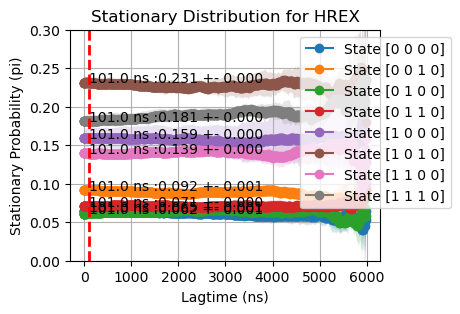

In [9]:
plt.figure(figsize=(4, 3))
state_to_plot = [0, 6, 12, 18, 24, 30, 36, 42]

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(hrex_lagtimes_ns, hrex_pi_all_means_0[:, i], '-o', label=f'State {hrex_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(hrex_lagtimes_ns, 
                     hrex_pi_all_means_0[:, i] + hrex_pi_all_stds_0[:, i],  # Upper bound
                     hrex_pi_all_means_0[:, i] - hrex_pi_all_stds_0[:, i],  # Lower bound
                     alpha=0.2)
    
    # Annotate the first point with its value
    first_x = hrex_lagtimes_ns[14]
    first_y = pi_all_means_0[14, i]
    first_y_var = pi_all_stds[14, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=10)
    print(f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)
plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (pi)')
plt.title('Stationary Distribution for HREX')
plt.ylim(0, 0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


## EE

In [10]:
def ee_index_to_state(index):
    """
    Converts an index (0-31) into a (4,) array where the first three
    entries are binary bits (0 or 1) and the last entry is in [0..3].

    The logic is:
      - The last entry is index % 4.
      - The first 3 bits come from index // 4, in [0..7].
    """
    if not (0 <= index < 32):
        raise ValueError(f"Index out of range: {index}. Expected 0-31.")

    # Last element: in [0..3]
    last_part = index % 4

    # The 3-bit portion is the integer in [0..7]
    binary_index = index // 4  # in [0..7]

    # Convert that binary_index into a 3-bit binary string, e.g. '011'
    binary_str = format(binary_index, '03b')

    # Create an array of the three bits
    bits = np.array([int(bit) for bit in binary_str], dtype=int)

    # Combine [first 3 bits, last_part]
    state = np.concatenate([bits, [last_part]])
    
    return state

In [11]:
ee_path = '../EE/analysis'

omega_loaded = Data.load(f"{ee_path}/autocoorel_data/stationary_distributions.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_stds = omega_loaded[3]
ee_lagtimes_ns = omega_loaded[8]
pi_all_means


array([[0.01496437, 0.01463983, 0.01479761, ..., 0.04608255, 0.0470104 ,
        0.05032458],
       [0.01494107, 0.01459601, 0.01478793, ..., 0.04570925, 0.0467329 ,
        0.05004378],
       [0.01504323, 0.01471755, 0.01485999, ..., 0.04598389, 0.04683238,
        0.05020124],
       ...,
       [0.03304838, 0.03203204, 0.03159612, ..., 0.03258202, 0.03019445,
        0.0298789 ],
       [0.03323153, 0.03181722, 0.03102532, ..., 0.0323242 , 0.03331344,
        0.03076401],
       [0.03101649, 0.03097138, 0.03045342, ..., 0.03153865, 0.03055109,
        0.03279286]])

In [12]:
state_index = [0, 4, 8, 12, 16, 20, 24, 28]
state_index = np.array(state_index)

state_num = 4
cis_trans_pi_means = []  # To store each (3, 604, 2)
cis_trans_pi_stds = []

for state in range(state_num):
    index = state_index + state

    # Extract columns from the second dimension
    pi_means = pi_all_means[:, index]
    pi_stds = pi_all_stds[:, index]
    print(pi_means.shape)

    # Compute row sums
    row_sums = pi_means.sum(axis=1, keepdims=True)
    # Renormalize the mean
    pi_means /= row_sums
    # Renormalize the standard deviation
    pi_stds /= row_sums

    # Print shapes to confirm correctness
    print(f"pi_means shape: {pi_means.shape}")  # Expected: (4, 8)
    print(f"pi_stds shape: {pi_stds.shape}")  # Expected: (4, 8)

    # Store each normalized pair
    cis_trans_pi_means.append(pi_means)
    cis_trans_pi_stds.append(pi_stds)

# Stack results into shape: (6, 3, 604, 2)
ee_cis_trans_pi_means = np.stack(np.array(cis_trans_pi_means), axis=0)
ee_cis_trans_pi_stds = np.stack(np.array(cis_trans_pi_stds), axis=0)

print("cis_trans_pi_means shape:", ee_cis_trans_pi_means.shape)
print("ee_cis_trans_pi_stds shape:", ee_cis_trans_pi_stds.shape)

#cis_trans_pi_means

(184, 8)
pi_means shape: (184, 8)
pi_stds shape: (184, 8)
(184, 8)
pi_means shape: (184, 8)
pi_stds shape: (184, 8)
(184, 8)
pi_means shape: (184, 8)
pi_stds shape: (184, 8)
(184, 8)
pi_means shape: (184, 8)
pi_stds shape: (184, 8)
cis_trans_pi_means shape: (4, 184, 8)
ee_cis_trans_pi_stds shape: (4, 184, 8)


Thermo 0, Conf 0: 101.00 ns : 0.061
Thermo 0, Conf 1: 101.00 ns : 0.096
Thermo 0, Conf 2: 101.00 ns : 0.060
Thermo 0, Conf 3: 101.00 ns : 0.079
Thermo 0, Conf 4: 101.00 ns : 0.142
Thermo 0, Conf 5: 101.00 ns : 0.236
Thermo 0, Conf 6: 101.00 ns : 0.137
Thermo 0, Conf 7: 101.00 ns : 0.189


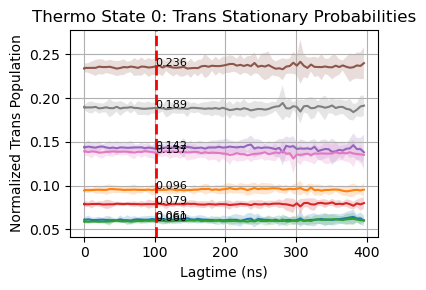

In [25]:
point_to_plot = 84
lagtime_plot = 24  # Index of lagtime to annotate

thermo_state_num = 1
comform_state_num = 8

for thermo in range(thermo_state_num):
    plt.figure(figsize=(4, 3))

    for conform in range(comform_state_num):
        res = ee_cis_trans_pi_means[thermo, :point_to_plot, conform]  # shape (point_to_plot,)
        std = ee_cis_trans_pi_stds[thermo, :point_to_plot, conform]  # shape (point_to_plot,)

        plt.plot(
            ee_lagtimes_ns[:point_to_plot],
            res,
            label=f"Conf {conform} - {res[lagtime_plot]:.3f} ± {std[lagtime_plot]:.3f}"
        )

        plt.fill_between(
            ee_lagtimes_ns[:point_to_plot],
            res + std,
            res - std,
            alpha=0.2
        )

        # Annotate point at selected lagtime
        x_val = ee_lagtimes_ns[lagtime_plot]
        y_val = res[lagtime_plot]
        plt.text(x_val, y_val, f"{y_val:.3f}", fontsize=8)

        print(f"Thermo {thermo}, Conf {conform}: {x_val:.2f} ns : {y_val:.3f}")

    plt.axvline(x=ee_lagtimes_ns[lagtime_plot], color='r', linestyle='--', linewidth=2)
    plt.title(f"Thermo State {thermo}: Trans Stationary Probabilities")
    plt.xlabel("Lagtime (ns)")
    plt.ylabel("Normalized Trans Population")
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    plt.show()


## REDs

In [14]:
def reds_index_to_state(index):
    """
    Converts an index (0..23) into a (4,) array where the first three
    entries are bits (0 or 1) and the last entry is in [0..2].
    
    Inverse of:
        index = 12*a + 6*b + 3*c + x,
    where a, b, c ∈ {0,1}, x ∈ [0..2]
    """
    if not (0 <= index < 24):
        raise ValueError(f"Index out of range: {index}. Expected 0..23.")

    x = index % 3
    remainder = index // 3  # Gives 0..7

    c = remainder % 2
    b = (remainder // 2) % 2
    a = (remainder // 4) % 2

    return np.array([a, b, c, x], dtype=int)


In [15]:
reds_path = '../REDs/analysis'

omega_loaded = Data.load(f"{reds_path}/autocoorel_data/stationary_distributions.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_stds = omega_loaded[3]
reds_lagtimes_ns = omega_loaded[8]

pi_all_means.shape

(679, 24)

In [16]:
state0_index = np.arange(0, 24, 3).tolist()

# Extract columns from the second dimension
pi_all_means_0 = pi_all_means[:, state0_index]
pi_all_stds_0 = pi_all_stds[:, state0_index]

# Compute row sums
row_sums = pi_all_means[:, state0_index].sum(axis=1, keepdims=True)
# Renormalize the mean
pi_all_means_0 /= row_sums
# Renormalize the standard deviation
pi_all_stds_0 /= row_sums

reds_pi_all_means_0 = pi_all_means_0
reds_pi_all_stds_0 = pi_all_stds_0

# Print shapes to confirm correctness
print(f"reds_pi_all_means_0 shape: {reds_pi_all_means_0.shape}")  # Expected: (4, 8)
print(f"reds_pi_all_stds_0 shape: {reds_pi_all_stds_0.shape}")  # Expected: (4, 8)

reds_pi_all_means_0 shape: (679, 8)
reds_pi_all_stds_0 shape: (679, 8)


200.4 ns : 0.068 ± 0.004
200.4 ns : 0.079 ± 0.009
200.4 ns : 0.059 ± 0.004
200.4 ns : 0.072 ± 0.005
200.4 ns : 0.152 ± 0.022
200.4 ns : 0.240 ± 0.017
200.4 ns : 0.129 ± 0.014
200.4 ns : 0.201 ± 0.000


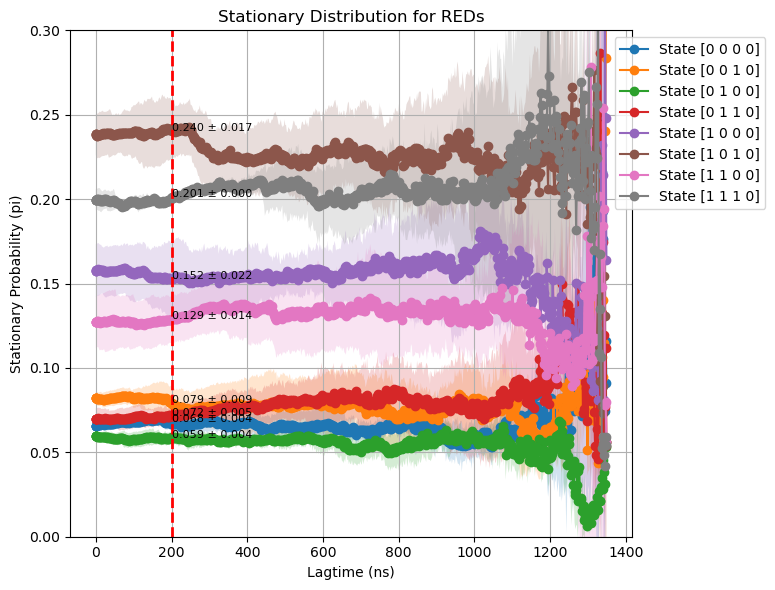

In [26]:
lagtime_plot = 104  # Index of lagtime to annotate
thermo_state = 0
plt.figure(figsize=(8, 6))
state_to_plot = (np.arange(0, 24, 3) + thermo_state).tolist()

for state in range(8):
    plt.plot(reds_lagtimes_ns, reds_pi_all_means_0[:, state], '-o', label=f'State {reds_index_to_state(state * 3)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(reds_lagtimes_ns, 
                        reds_pi_all_means_0[:, state] + reds_pi_all_stds_0[:, state],
                        reds_pi_all_means_0[:, state] - reds_pi_all_stds_0[:, state],
                        alpha=0.2)

    # Annotate the selected lagtime point
    first_x = reds_lagtimes_ns[lagtime_plot]
    first_y = reds_pi_all_means_0[lagtime_plot][state]
    first_y_var = reds_pi_all_stds_0[lagtime_plot][state]
    plt.text(first_x, first_y,  f"{first_y:.3f} ± {first_y_var:.3f}", fontsize=8)
    print(f"{first_x} ns : {first_y:.3f} ± {first_y_var:.3f}")

# Only one vertical line after loop
plt.axvline(x=reds_lagtimes_ns[lagtime_plot], color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (pi)')
plt.title('Stationary Distribution for REDs')
plt.ylim(0, 0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


## Combine plot with log scale 

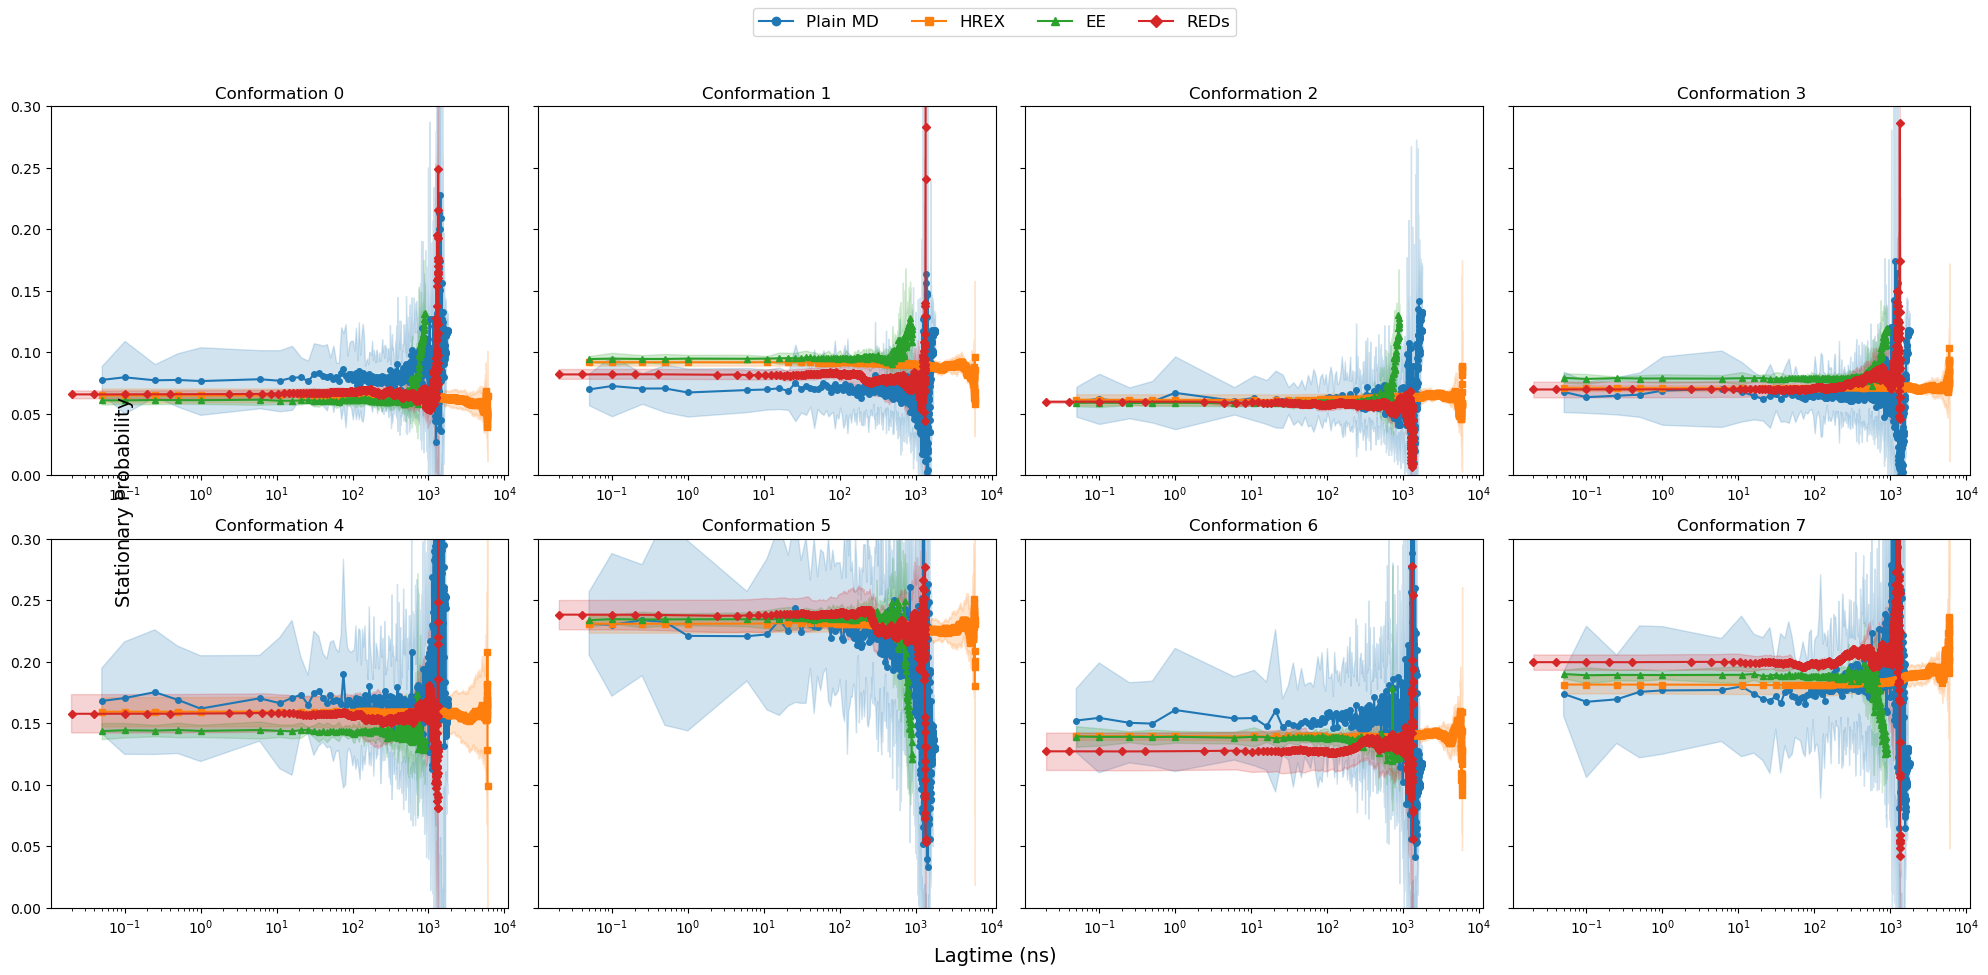

In [36]:
# Default color cycle for 4 methods
prop_cycle = plt.rcParams['axes.prop_cycle']
method_colors = prop_cycle.by_key()['color']

methods = ["Plain MD", "HREX", "EE", "REDs"]
num_conformations = 8

# Global y limit
ymin, ymax = 0, 0.3

fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
axs = axs.flatten()

# Loop over conformations
for conf in range(num_conformations):
    ax = axs[conf]
    
    # Plain MD
    ax.plot(
        plain_md_lagtimes_ns, 
        plain_md_pi_all_means[:, conf],
        '-o', color=method_colors[0], markersize=4, linewidth=1.5,
        label='Plain MD' if conf == 0 else None
    )
    ax.fill_between(
        plain_md_lagtimes_ns, 
        plain_md_pi_all_means[:, conf] + plain_md_pi_all_stds[:, conf],
        plain_md_pi_all_means[:, conf] - plain_md_pi_all_stds[:, conf],
        color=method_colors[0], alpha=0.2
    )
    
    # HREX
    ax.plot(
        hrex_lagtimes_ns, 
        hrex_pi_all_means_0[:, conf],
        '-s', color=method_colors[1], markersize=4, linewidth=1.5,
        label='HREX' if conf == 0 else None
    )
    ax.fill_between(
        hrex_lagtimes_ns, 
        hrex_pi_all_means_0[:, conf] + hrex_pi_all_stds_0[:, conf],
        hrex_pi_all_means_0[:, conf] - hrex_pi_all_stds_0[:, conf],
        color=method_colors[1], alpha=0.2
    )
    
    # EE (only use thermo=0 if only one thermo state)
    thermo_state = 0
    ax.plot(
        ee_lagtimes_ns, 
        ee_cis_trans_pi_means[thermo_state, :, conf],
        '-^', color=method_colors[2], markersize=4, linewidth=1.5,
        label='EE' if conf == 0 else None
    )
    ax.fill_between(
        ee_lagtimes_ns, 
        ee_cis_trans_pi_means[thermo_state, :, conf] + ee_cis_trans_pi_stds[thermo_state, :, conf],
        ee_cis_trans_pi_means[thermo_state, :, conf] - ee_cis_trans_pi_stds[thermo_state, :, conf],
        color=method_colors[2], alpha=0.2
    )
    
    # REDs
    ax.plot(
        reds_lagtimes_ns, 
        reds_pi_all_means_0[:, conf],
        '-D', color=method_colors[3], markersize=4, linewidth=1.5,
        label='REDs' if conf == 0 else None
    )
    ax.fill_between(
        reds_lagtimes_ns, 
        reds_pi_all_means_0[:, conf] + reds_pi_all_stds_0[:, conf],
        reds_pi_all_means_0[:, conf] - reds_pi_all_stds_0[:, conf],
        color=method_colors[3], alpha=0.2
    )
    
    ax.set_ylim(ymin, ymax)
    ax.set_title(f"Conformation {conf}", fontsize=12)
    ax.set_xscale('log')   
    ax.grid(False)  # <<<<<<<<<<<< Grid fully disabled

# Shared labels
fig.text(0.5, 0.04, 'Lagtime (ns)', ha='center', fontsize=14)
fig.text(0.06, 0.5, 'Stationary Probability', va='center', rotation='vertical', fontsize=14)

# Global legend
handles = [
    plt.Line2D([], [], color=method_colors[i], marker=marker, linestyle='-', markersize=6, linewidth=1.5, label=methods[i])
    for i, marker in enumerate(['o', 's', '^', 'D'])
]
fig.legend(handles=handles, loc='upper center', ncol=4, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.savefig(f"fig/stationary_population_all_8_conform_log_scale.pdf", )

plt.show()


## Combine Plot 

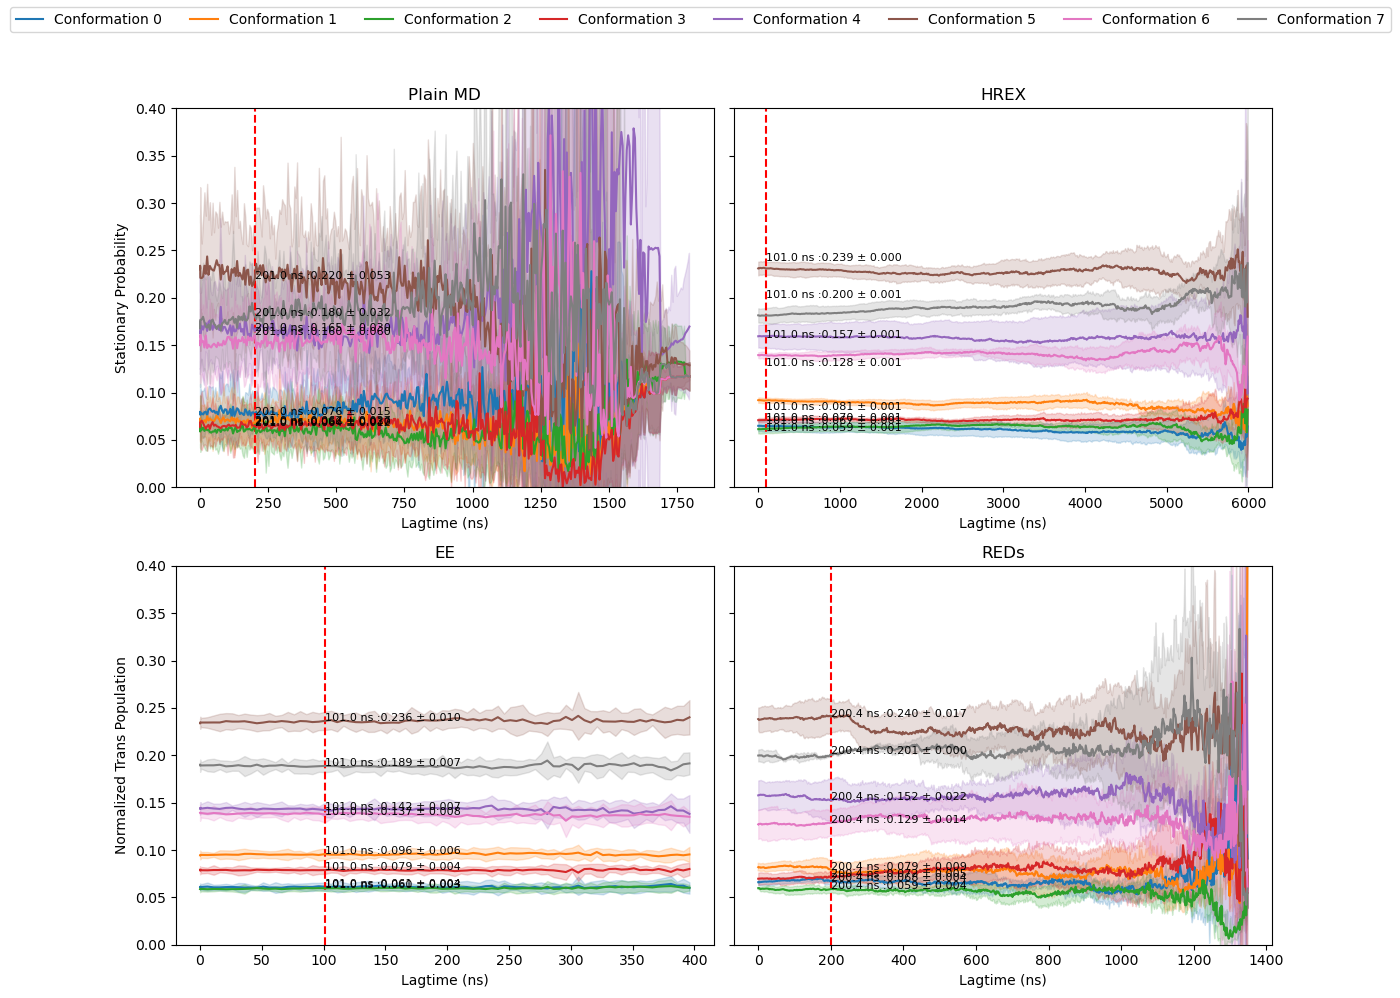

In [35]:
# Get matplotlib default color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
default_colors = prop_cycle.by_key()['color']

num_states = 8  # Total number of conformations

# ====== GLOBAL Y-LIMIT OPTION ======
ymin = 0  # You can modify here
ymax = 0.4

fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# ======== Subplot 1: Plain MD ========
ax = axs[0, 0]
state_to_plot = range(num_states)
for i in state_to_plot:
    color = default_colors[i % len(default_colors)]
    ax.plot(
        plain_md_lagtimes_ns, plain_md_pi_all_means[:, i],
        '-', color=color, linewidth=1.5
    )
    ax.fill_between(
        plain_md_lagtimes_ns,
        plain_md_pi_all_means[:, i] + plain_md_pi_all_stds[:, i],
        plain_md_pi_all_means[:, i] - plain_md_pi_all_stds[:, i],
        color=color, alpha=0.2
    )
    if i == 0:
        first_x = plain_md_lagtimes_ns[44]
        ax.axvline(x=first_x, color='r', linestyle='--', linewidth=1.5)
    first_y = plain_md_pi_all_means[44, i]
    first_y_var = plain_md_pi_all_stds[44, i]
    ax.text(first_x, first_y, f"{first_x} ns :{first_y:.3f} ± {first_y_var:.3f}", fontsize=8)

ax.set_xlabel('Lagtime (ns)')
ax.set_ylabel('Stationary Probability')
ax.set_title('Plain MD')
ax.set_ylim(ymin, ymax)

# ======== Subplot 2: HREX ========
ax = axs[0, 1]
state_to_plot = [0, 6, 12, 18, 24, 30, 36, 42]
for i, state in enumerate(state_to_plot):
    color = default_colors[i % len(default_colors)]
    ax.plot(
        hrex_lagtimes_ns, hrex_pi_all_means_0[:, i],
        '-', color=color, linewidth=1.5
    )
    ax.fill_between(
        hrex_lagtimes_ns,
        hrex_pi_all_means_0[:, i] + hrex_pi_all_stds_0[:, i],
        hrex_pi_all_means_0[:, i] - hrex_pi_all_stds_0[:, i],
        color=color, alpha=0.2
    )
    if i == 0:
        first_x = hrex_lagtimes_ns[14]
        ax.axvline(x=first_x, color='r', linestyle='--', linewidth=1.5)
    first_y = pi_all_means_0[14, i]
    first_y_var = pi_all_stds[14, i]
    ax.text(first_x, first_y, f"{first_x} ns :{first_y:.3f} ± {first_y_var:.3f}", fontsize=8)

ax.set_xlabel('Lagtime (ns)')
ax.set_title('HREX')
ax.set_ylim(ymin, ymax)

# ======== Subplot 3: EE ========
ax = axs[1, 0]
point_to_plot = 84
lagtime_plot = 24
thermo_state_num = 1

for thermo in range(thermo_state_num):
    for i in range(num_states):
        color = default_colors[i % len(default_colors)]
        res = ee_cis_trans_pi_means[thermo, :point_to_plot, i]
        std = ee_cis_trans_pi_stds[thermo, :point_to_plot, i]

        ax.plot(
            ee_lagtimes_ns[:point_to_plot], res,
            '-', color=color, linewidth=1.5
        )
        ax.fill_between(
            ee_lagtimes_ns[:point_to_plot],
            res + std, res - std,
            color=color, alpha=0.2
        )
        if thermo == 0 and i == 0:
            x_val = ee_lagtimes_ns[lagtime_plot]
            ax.axvline(x=x_val, color='r', linestyle='--', linewidth=1.5)
        y_val = res[lagtime_plot]
        y_var = std[lagtime_plot]
        ax.text(x_val, y_val, f"{x_val} ns :{y_val:.3f} ± {y_var:.3f}", fontsize=8)

ax.set_xlabel("Lagtime (ns)")
ax.set_ylabel("Normalized Trans Population")
ax.set_title("EE")
ax.set_ylim(ymin, ymax)

# ======== Subplot 4: REDs ========
ax = axs[1, 1]
lagtime_plot = 104

for i in range(num_states):
    color = default_colors[i % len(default_colors)]
    ax.plot(
        reds_lagtimes_ns, reds_pi_all_means_0[:, i],
        '-', color=color, linewidth=1.5
    )
    ax.fill_between(
        reds_lagtimes_ns,
        reds_pi_all_means_0[:, i] + reds_pi_all_stds_0[:, i],
        reds_pi_all_means_0[:, i] - reds_pi_all_stds_0[:, i],
        color=color, alpha=0.2
    )
    if i == 0:
        first_x = reds_lagtimes_ns[lagtime_plot]
        ax.axvline(x=first_x, color='r', linestyle='--', linewidth=1.5)
    first_y = reds_pi_all_means_0[lagtime_plot][i]
    first_y_var = reds_pi_all_stds_0[lagtime_plot][i]
    ax.text(first_x, first_y, f"{first_x} ns :{first_y:.3f} ± {first_y_var:.3f}", fontsize=8)

ax.set_xlabel('Lagtime (ns)')
ax.set_title('REDs')
ax.set_ylim(ymin, ymax)

# ======== Global Legend ========
handles = [
    plt.Line2D([], [], color=default_colors[i % len(default_colors)], linestyle='-', linewidth=1.5, label=f'Conformation {i}')
    for i in range(num_states)
]
fig.legend(handles=handles, loc='upper center', ncol=num_states, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig(f"fig/stationary_population_all_8_conform.pdf", )
plt.show()
